<h1>Challenge 1</h1>

In [65]:
import pandas as pd
from sklearn.cross_validation import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [28]:
df=pd.read_csv('house-votes-84.csv')
df.replace('y',1, inplace=True)
df.replace('n',0, inplace=True)
cols=list(df.columns)
cols.pop(0)
for i in cols:
    df[i].replace('?',int(df[i].mode()), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df['y.8'], test_size=.3, random_state=4444)
model=KNeighborsClassifier(n_jobs=-1, n_neighbors=11)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('precision score: {}'.format(precision_score(y_test,y_pred)))
print('recall score: {}'.format(recall_score(y_test,y_pred)))
print('f1 score: {}'.format(f1_score(y_test,y_pred)))

accuracy score: 0.8473282442748091
precision score: 0.8991596638655462
recall score: 0.9304347826086956
f1 score: 0.9145299145299145


<h1>Challenge 2</h1>

AUC is: 0.6162464985994398
ROC curve:


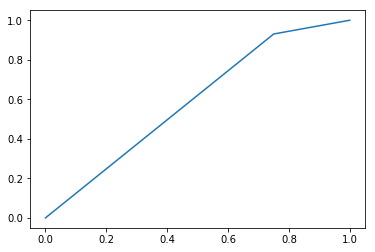

In [52]:
g=roc_curve(y_test,y_pred)
plt.plot(g[0],g[1])
g=roc_auc_score(y_pred,y_test)
print('AUC is: {}'.format(g))
print('ROC curve:')
plt.show()

<h1>Challenge 3</h1>

In [54]:
df=pd.read_csv('house-votes-84.csv')
df.replace('y',1, inplace=True)
df.replace('n',0, inplace=True)
cols=list(df.columns)
cols.pop(0)
for i in cols:
    df[i].replace('?',int(df[i].mode()), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df['y.8'], test_size=.3, random_state=4444)
model=KNeighborsClassifier(n_jobs=-1, n_neighbors=11)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('precision score: {}'.format(precision_score(y_test,y_pred)))
print('recall score: {}'.format(recall_score(y_test,y_pred)))
print('f1 score: {}'.format(f1_score(y_test,y_pred)))

accuracy score: 0.8473282442748091
precision score: 0.8991596638655462
recall score: 0.9304347826086956
f1 score: 0.9145299145299145


In [61]:
kfold = KFold(len(X_train), n_folds=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
scores

array([ 0.75409836,  0.75409836,  0.83606557,  0.8       ,  0.88333333])

<h1>Challenge 4</h1>

In [156]:
df=pd.read_csv('2013_movies.csv')

df.Rating.replace('G',0, inplace=True)
df.Rating.replace('PG',1, inplace=True)
df.Rating.replace('PG-13',2, inplace=True)
df.Rating.replace('R',3, inplace=True)
df.Budget.fillna(df.Budget.mean(),inplace=True )
df.DomesticTotalGross.fillna(df.DomesticTotalGross.mean(),inplace=True )

X_train, X_test, y_train, y_test = train_test_split(df[['DomesticTotalGross','Budget','Runtime']], df['Rating'], test_size=.3, random_state=4444)

model=KNeighborsClassifier(n_jobs=-1, n_neighbors=11)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print('KNN score: {}'.format(accuracy_score(y_pred, y_test)))
# print('precision score: {}'.format(precision_score(y_test,y_pred)))
# print('recall score: {}\n'.format(recall_score(y_test,y_pred)))


model=LogisticRegression(n_jobs=-1)
model.fit(X_train, y_train)
print(model.coef_)
y_pred=model.predict(X_test)
print('Logistic score: {}'.format(accuracy_score(y_pred, y_test)))
# print('precision score: {}'.format(precision_score(y_test,y_pred)))
# print('recall score: {}\n'.format(recall_score(y_test,y_pred)))


y_pred=list(y_test.mode() for i in y_test)
print('mode score: {}'.format(accuracy_score(y_pred, y_test)))
# print('precision score: {}'.format(precision_score(y_test,y_pred)))
# print('recall score: {}'.format(recall_score(y_test,y_pred)))

KNN score: 0.5
[[  1.97077544e-09  -8.50264852e-08  -1.87685018e-12]
 [ -8.80560498e-09  -5.97342871e-09  -9.87494061e-14]
 [ -3.87137614e-09   6.56358743e-09  -2.07959351e-14]
 [  2.31395492e-09  -1.39449813e-08   7.60797578e-14]]
Logistic score: 0.4666666666666667
mode score: 0.4666666666666667


<h1>Challenge 5</h1>

In [94]:
df= pd.read_csv('haberman.csv')
X_train, X_test, y_train, y_test = train_test_split(df[['30','64','1']], df['1.1'], test_size=.3, random_state=4444)
y_test=y_test-1
y_train=y_train-1
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)


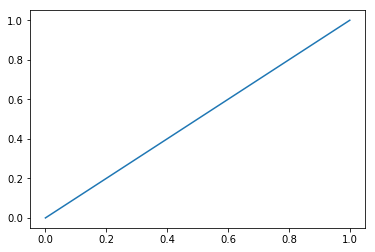

In [95]:
g=roc_curve(y_test,y_pred)
plt.plot(g[0],g[1])
plt.show()